In [67]:
import torch
import torch.nn.functional as F
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from model import get_model
import matplotlib.pyplot as plt

In [68]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

## Download the MNIST 

MNIST is considered the hello world of ML

In [69]:
batch_size = 256
train_dataset = mnist.MNIST(
    root="./dataset", train=True, download=True, transform=transform
)
test_dataset = mnist.MNIST(root="./dataset", train=False, transform=transform)

## Load the training set

In [70]:
train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [71]:
training_data = train_loader.dataset

## Sample the training set
The training set is a 70,000 small images of handwritten digits. To sample the data use the `dataset`
 
`img, label = training_data[sample_idx]`

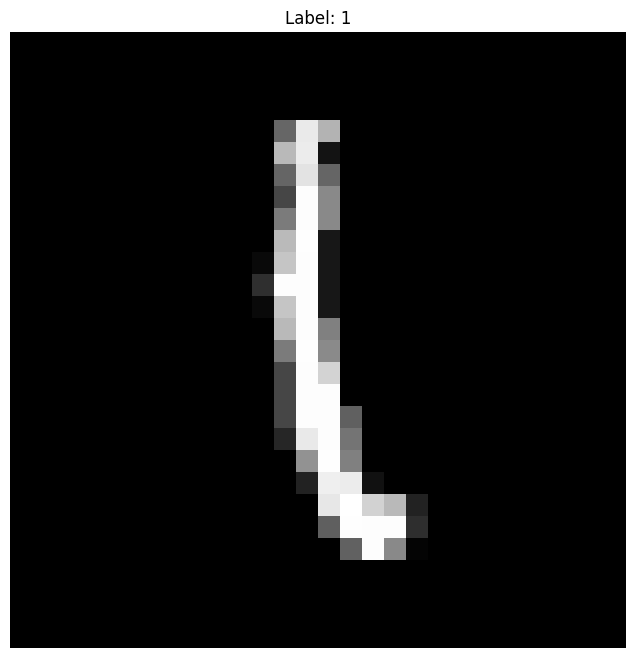

In [72]:
figure = plt.figure(figsize=(8, 8))
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
plt.title(f'Label: {label}')  # Set the title to the current label
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

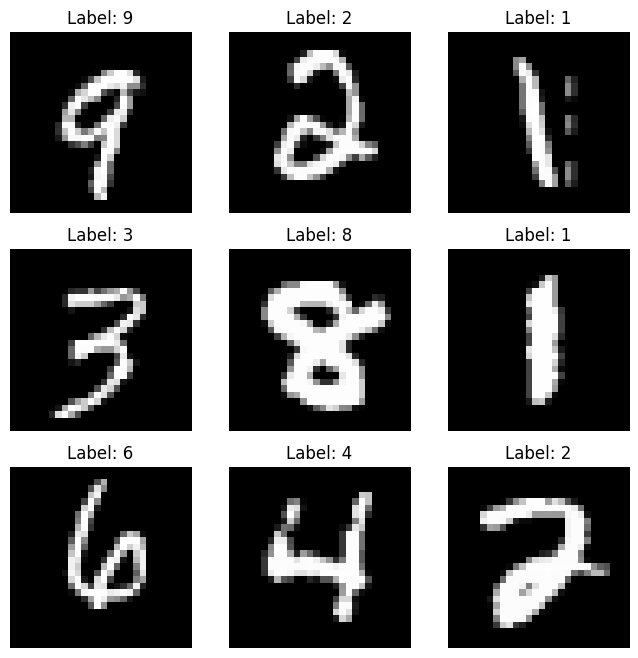

In [73]:
# Create a figure with subplots
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f'Label: {label}')  # Set the title to the current label
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [74]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        predicted = output.argmax(
            dim=1, keepdim=True
        )
        correct += predicted.eq(target.view_as(predicted)).sum().item()
        total += target.size(0)

    epoch_loss /= len(train_loader)
    epoch_accuracy = 100.0 * correct / total
    print(
        "Train Epoch: {} \tAverage Loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, epoch_loss, epoch_accuracy
        )
    )

## Load the pytorch CNN Model

In [75]:
Net = get_model()

## Set the Device

- torch.device("mps") - if you have a Macbook M1
- torch.device("cuda") - if you have nvidia GPU, else
- torch.device("cpu") - cpu = takes more than 1 hr if 40 epochs 

In [76]:
device = "cpu"
if not torch.backends.mps.is_available():
    if torch.backends.cuda.is_avaiable():
        device = "cuda"
else:
    device = torch.device("mps")
    
device

device(type='mps')

In [77]:
model = Net().to(device)

## Setup the Adam as the stochastic gradient descent algorithm

In [78]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:
num_epochs = 40
for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)

model.to(device)
torch.save(model.state_dict(), "model/mnist.pth")

Train Epoch: 1 	Average Loss: 0.288199	Accuracy: 91.17%
Train Epoch: 2 	Average Loss: 0.091064	Accuracy: 97.29%
Train Epoch: 3 	Average Loss: 0.068538	Accuracy: 97.96%
Train Epoch: 4 	Average Loss: 0.059020	Accuracy: 98.18%
Train Epoch: 5 	Average Loss: 0.048167	Accuracy: 98.53%
Train Epoch: 6 	Average Loss: 0.043292	Accuracy: 98.67%
Train Epoch: 7 	Average Loss: 0.038382	Accuracy: 98.77%
Train Epoch: 8 	Average Loss: 0.033963	Accuracy: 98.88%
Train Epoch: 9 	Average Loss: 0.030831	Accuracy: 99.02%
Train Epoch: 10 	Average Loss: 0.027226	Accuracy: 99.12%
Train Epoch: 11 	Average Loss: 0.028306	Accuracy: 99.04%
Train Epoch: 12 	Average Loss: 0.027516	Accuracy: 99.10%
Train Epoch: 13 	Average Loss: 0.024192	Accuracy: 99.21%
Train Epoch: 14 	Average Loss: 0.022967	Accuracy: 99.26%
Train Epoch: 15 	Average Loss: 0.019617	Accuracy: 99.31%
Train Epoch: 16 	Average Loss: 0.019850	Accuracy: 99.32%
Train Epoch: 17 	Average Loss: 0.019516	Accuracy: 99.38%
Train Epoch: 18 	Average Loss: 0.019399	